# Gold Price Prediction using Machine Learning with Python

In [1]:
# Importing the Desired library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
# Read the csv file.
gold=pd.read_csv("gld_price_data.csv")

In [3]:
# To view the top 5 Datapoints of the dataset
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# to view the last 5 datapoints of the dataset
gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# To view the size of the dataset
gold.shape

(2290, 6)

In [6]:
# To view the size of the dataset
gold.size

13740

In [7]:
# To view the columns of the dataset
gold.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [8]:
# To view the information of the dataset
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# To describe the dataset.
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# EDA

In [10]:
# to view the relations between the features of the dataset
correlation=gold.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


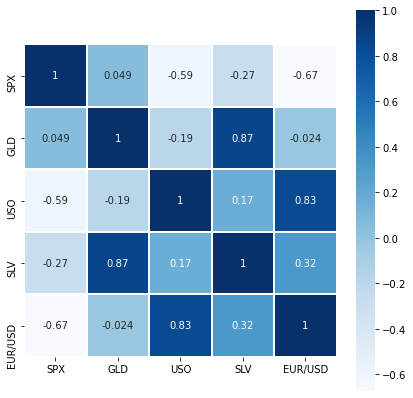

In [11]:
# To visualise the correlation of the dataset
plt.figure(figsize=(7,7))
sns.heatmap(correlation, cmap='Blues',annot=True,linewidths=1,linecolor='white',cbar=True,square=True)
plt.show()

#Here we find the Nagative and positive Correlation with the help of heatmap

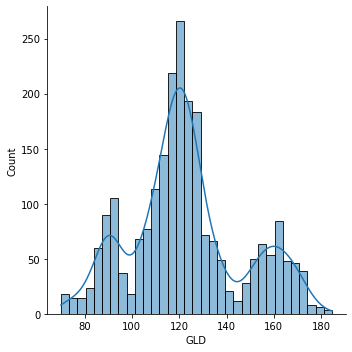

In [12]:
# To visualised the distribution of the GLD-data
sns.displot(gold['GLD'],kde=True)
plt.show()

<AxesSubplot:xlabel='EUR/USD', ylabel='Density'>

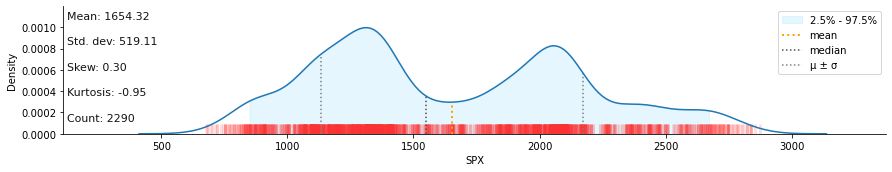

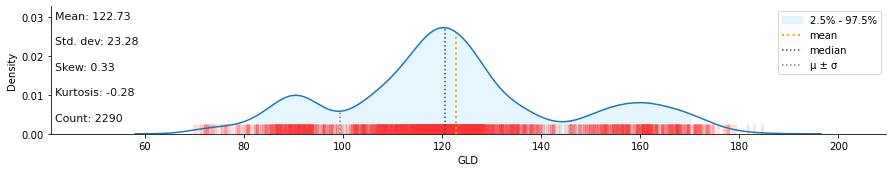

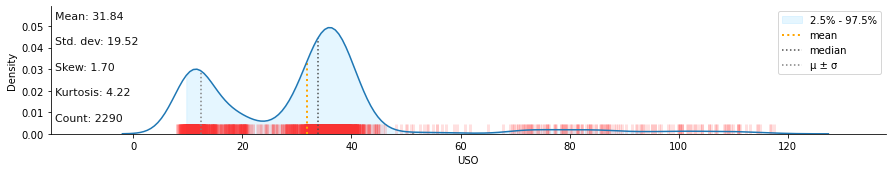

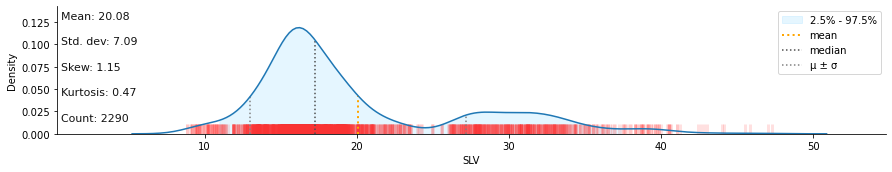

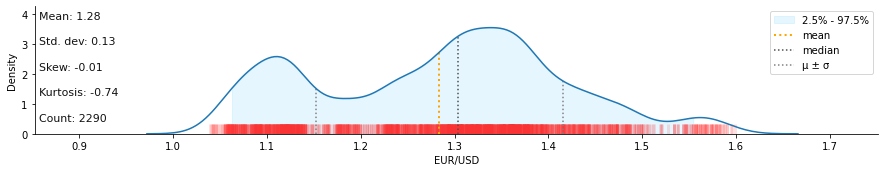

In [13]:
# To visualised the distribution of the data in dataset.
import klib
klib.dist_plot(gold)

In [14]:
# TO find the null value
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

<Figure size 504x504 with 0 Axes>

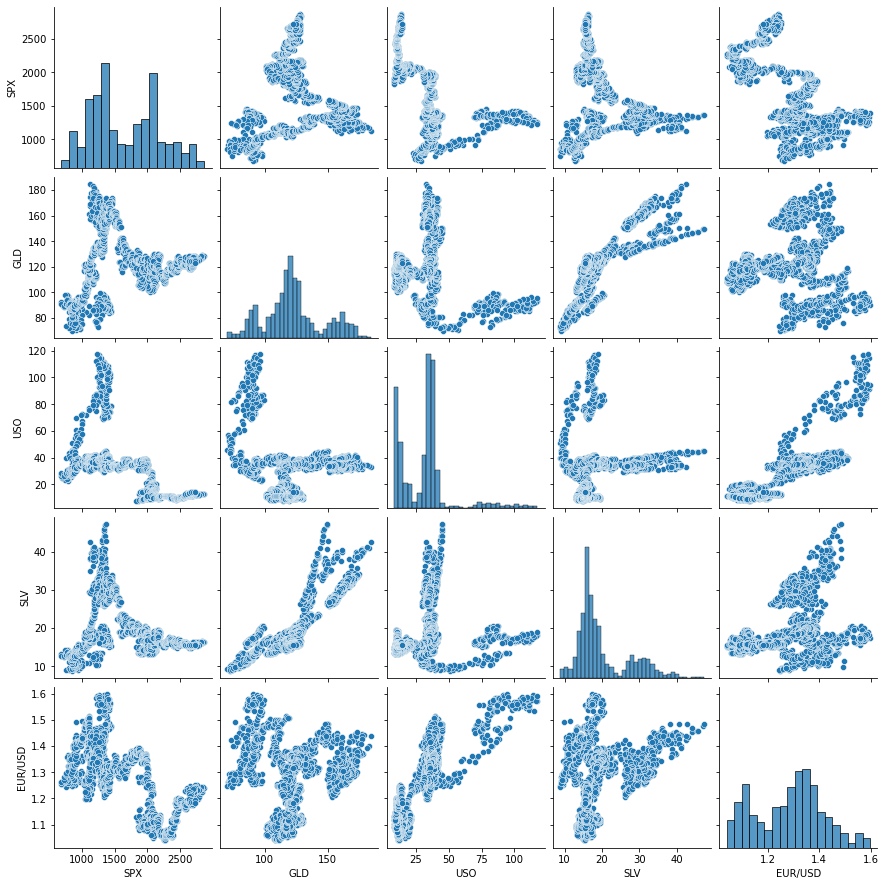

In [15]:
plt.figure(figsize=(7,7))
sns.pairplot(gold, kind='scatter')
plt.show()

# Modeling the Dataset

In [16]:
# Dropping the uneven data
gold.drop('Date',axis=1,inplace=True)

In [17]:
# Displaying the new dataset.
gold.head()


,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [18]:
# Assigning independent and dependent variable
x=gold.drop('GLD',axis=1)
y=gold['GLD']

In [19]:
#taking the random forest regressor
rfr=RandomForestRegressor()

In [20]:
# Splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [21]:
# Modeling the dataset
train=rfr.fit(x_train,y_train)

In [22]:
# Prediction on train data
pred_train=rfr.predict(x_train)
pred_train

array([109.9784981 , 114.63470094,  90.67570007, ..., 130.61779688,
       159.76159576, 114.85129988])

In [23]:
# Prediction on test data
prect_test=rfr.predict(x_test)
prect_test

array([168.58029898,  82.49039937, 115.91490031, 127.74540088,
       120.64330159, 154.55949765, 150.38299832, 126.33129975,
       117.49879874, 126.03780068, 116.59790099, 172.57450088,
       141.0967986 , 167.96339857, 115.18119982, 117.97530041,
       140.16270328, 170.55580128, 159.57250253, 158.84349967,
       155.15820001, 125.28339975, 175.89339944, 157.24050402,
       125.3271003 ,  93.78580001,  77.72469985, 120.59749974,
       119.11289962, 167.39660016,  88.13170045, 125.27310029,
        91.26860094, 117.67070018, 121.1232993 , 136.72210198,
       115.43330116, 115.4233006 , 147.33389815, 107.27590094,
       104.06460215,  87.19509779, 126.59140006, 118.09419987,
       154.18529876, 119.38340052, 108.39700016, 108.27899814,
        93.1676003 , 127.14989767,  74.51630054, 113.75499941,
       121.2737001 , 111.38479908, 118.82309885, 120.9385994 ,
       159.7626015 , 169.27770097, 146.96449704,  85.82909845,
        94.51040023,  86.82489897,  90.66259995, 118.98

# Evaluation

In [24]:
# evaluation of the modeling
pred_train_score=r2_score(y_train,pred_train)
pred_train_score

0.9984011405413109

In [25]:
# evaluation of the testing data
pred_test_score=r2_score(y_test,prect_test)
pred_test_score

0.989236815367378